In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import torch
from torchvision import transforms

# Dataset path
data_path = Path("../../data/processed/01_final_dataset")

# transforms.py codes
NORMALIZE_MEAN = [0.485, 0.456, 0.406]
NORMALIZE_STD = [0.229, 0.224, 0.225]

def get_train_transforms(img_size=224):
    """
    augmentation and normalization for train images
    :param img_size:
    :return:
    """
    return transforms.Compose([
        transforms.RandomResizedCrop(img_size),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
        transforms.RandomRotation(degrees=10),
        transforms.ToTensor(),
        transforms.Normalize(mean=NORMALIZE_MEAN, std=NORMALIZE_STD),
    ])

print("Transform function loaded.")


Transform function loaded.


In [2]:
# Read dataset_split.csv
df_split = pd.read_csv(data_path / "dataset_split.csv")

# Random example from trainset
random_row = df_split[df_split['split'] == 'train'].sample(1).iloc[0]

# Class name and relative path
class_name_for_test = random_row['class_name']
img_relative_path = Path(random_row['file_path'])

# Exact path
img_path_end = Path(*img_relative_path.parts[3:])
img_path = data_path / img_path_end

original_image = Image.open(img_path).convert('RGB')

print(f'Random class: {class_name_for_test}')
print(f'Original image: {img_path}')

Random class: miso_soup
Original image: ..\..\data\processed\01_final_dataset\train\miso_soup\2240297.jpg


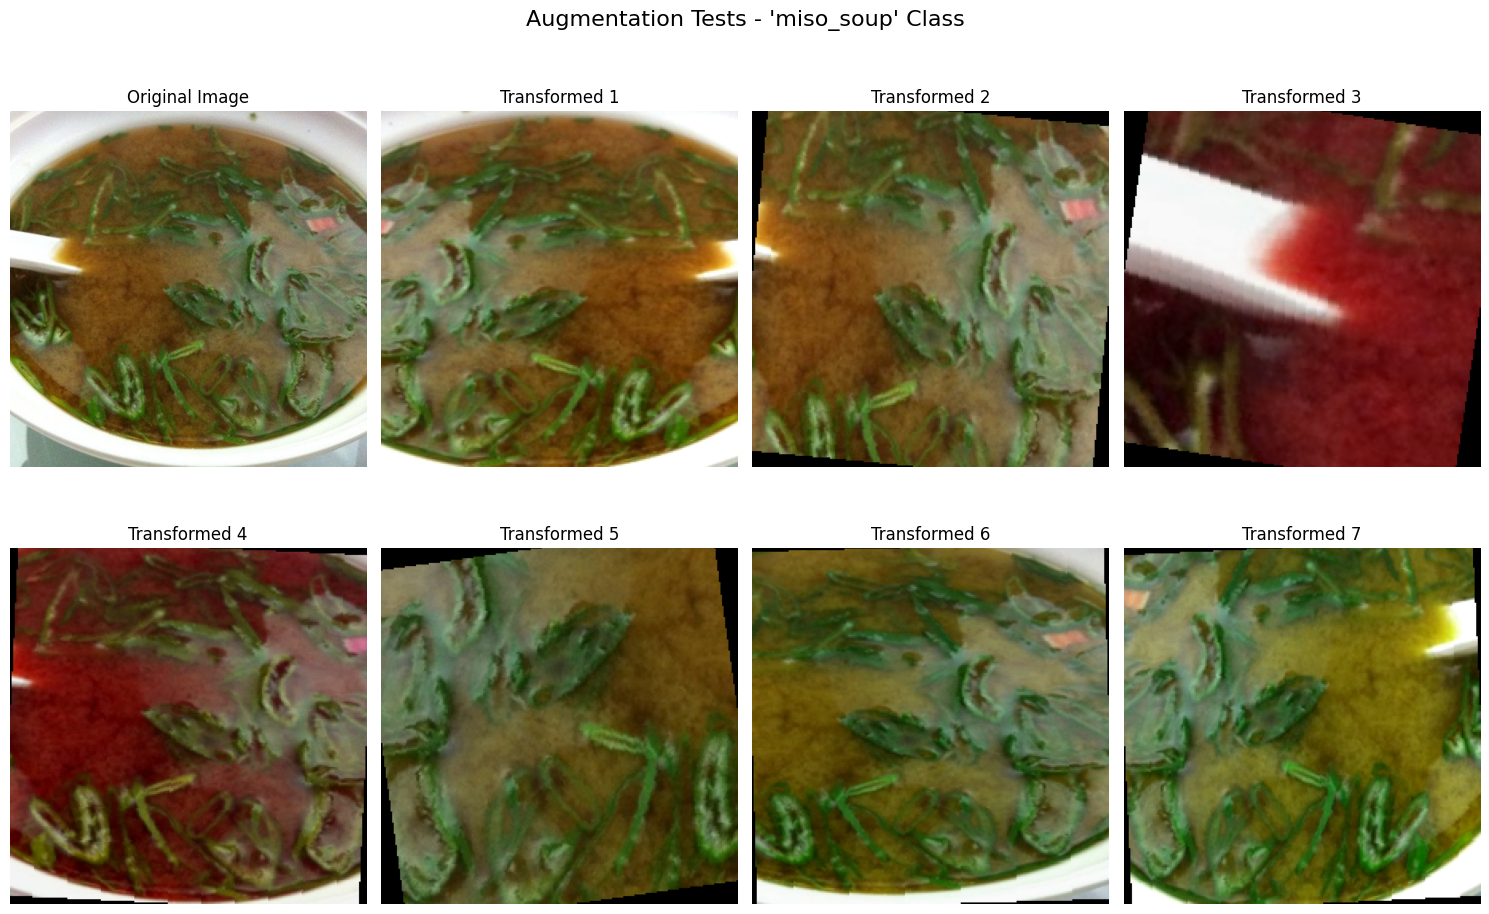

In [4]:
# Transform object
transform = get_train_transforms()

plt.figure(figsize=(15,10))

# Original Image
plt.subplot(2,4,1)
plt.imshow(original_image)
plt.title("Original Image", fontsize=12)
plt.axis('off')

# Apply random transforms
for i in range(7):
    # Get different results each iter
    augmented_image_tensor = transform(original_image)

    # Denormalize
    mean = torch.tensor(NORMALIZE_MEAN).view(3,1,1)
    std = torch.tensor(NORMALIZE_STD).view(3,1,1)
    augmented_image_denormalized = augmented_image_tensor * std + mean


    # Resize for matplotlib
    augmented_image = augmented_image_denormalized.permute(1,2,0)

    # Show image
    plt.subplot(2,4,i+2)
    plt.imshow(augmented_image)
    plt.title(f"Transformed {i+1}",fontsize=12)
    plt.axis("off")

plt.suptitle(f"Augmentation Tests - '{class_name_for_test}' Class", fontsize=16)
plt.tight_layout()
plt.show()